# Data Preparation

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jzhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
raw=pd.read_csv("agent_note - Copy.csv")
raw['comments'].iloc[1]

'"LiveVox rslt Answering Machine (Hung Up)  03-31-2017 08:13:06 am 8888193063","sip:(915)886-8281 nml","LiveVox rslt Answering Machine (Hung Up)  03-06-2017 08:31:46 am 8888193063","sip:(888)819-3063 nml","sip:(888)819-3063 nml","LiveVox rslt Answering Ma'

In [6]:
modifiedRaw = raw.dropna(subset = ['pco_prin_paid','comments']) # remove rows with NA in comments and prin_paid

In [7]:
def get_stemmed_text(text):
    text = text.lower() # lowercase
    text = re.sub("<!--?.*?-->","",text) # removetags
    text = re.sub("(\\d|\\W)+"," ",text) # remove special characters and digits
    text = text.replace('[^\w\s]','') # remove punctuation
    stemmer = PorterStemmer() # stemming 
    return stemmer.stem(text)

In [8]:
modifiedRaw['comments'] = modifiedRaw['comments'].apply(lambda x:get_stemmed_text(x))

C:\Users\jzhu\AppData\Local\Continuum\anaconda2\envs\py2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
X = modifiedRaw['comments']

In [10]:
Y = 1.0 * (modifiedRaw['pco_prin_paid']>0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

# Vectorization of words

In [12]:
stop_words = set(stopwords.words('english'))
# remove words occuring in more than 99.5% of the documents
# remove words occuring less than 10 times
# remove stopwords
cv = CountVectorizer(max_df = 0.995, min_df = 20, stop_words = stop_words)
X_train_counts = cv.fit_transform(X_train)
tfidf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)

In [13]:
cv.get_feature_names() # 2985 words being used as attributes

[u'aaron',
 u'ab',
 u'abandoned',
 u'able',
 u'abt',
 u'ac',
 u'acc',
 u'accept',
 u'accepted',
 u'accepting',
 u'access',
 u'accident',
 u'accidentally',
 u'accnt',
 u'accnts',
 u'acco',
 u'accordance',
 u'according',
 u'accoun',
 u'account',
 u'accounts',
 u'accredited',
 u'acct',
 u'accts',
 u'accurately',
 u'ach',
 u'act',
 u'acti',
 u'action',
 u'activ',
 u'activated',
 u'active',
 u'activity',
 u'ad',
 u'adam',
 u'adams',
 u'add',
 u'added',
 u'addition',
 u'additional',
 u'additionally',
 u'addl',
 u'addr',
 u'address',
 u'addresses',
 u'addy',
 u'adjustment',
 u'adv',
 u'advance',
 u'advantage',
 u'advc',
 u'advi',
 u'advis',
 u'advise',
 u'advised',
 u'advises',
 u'advocates',
 u'advs',
 u'advsd',
 u'advsed',
 u'adz',
 u'af',
 u'affects',
 u'afford',
 u'afternoon',
 u'ag',
 u'age',
 u'agency',
 u'agent',
 u'ago',
 u'agreed',
 u'agreement',
 u'agrees',
 u'ahead',
 u'air',
 u'ak',
 u'aka',
 u'akuzawinski',
 u'al',
 u'alan',
 u'albany',
 u'albuquerque',
 u'alert',
 u'alex',
 u'al

# GMB Model

In [14]:
#learning_rate = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
gb = GradientBoostingClassifier(n_estimators=10, max_features=2, max_depth = 2, random_state = 0)

In [15]:
model = gb.fit(X_train_tfidf, y_train)
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Feature Importance

In [54]:
nt_feature_importance = model.feature_importances_
nt_feature_importance.sort()
nt_feature_importance[2950:]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.70831862e-09, 9.10366057e-06, 2.14418736e-05,
       3.77168559e-05, 4.43839607e-05, 5.27518909e-05, 1.04992070e-04,
       8.19329449e-04, 1.64048369e-03, 1.86557201e-03, 2.56962468e-03,
       3.69921505e-03, 5.21637288e-03, 5.65921948e-03, 6.83635687e-03,
       8.28408268e-03, 8.59664661e-03, 8.89482672e-03, 9.20618292e-03,
       1.13222309e-02, 1.17880397e-02, 1.39376433e-02, 1.67884446e-02,
       1.88317854e-02, 2.59568154e-02, 5.14072750e-02, 5.45425620e-02,
       1.61666602e-01, 2.50762567e-01, 3.19437730e-01])

# Feature selection

In [17]:
nt_feature_importance = model.feature_importances_
nt_sorted_idx = np.argsort(-nt_feature_importance)
select = nt_sorted_idx[:30]
select 

array([2004, 1694,  771, 1899, 2016, 1749, 1190, 2182, 1441,  274, 1746,
       2821, 2305, 2337, 1069,  250, 2307,   43, 1428,  383,  300,  772,
       2679,  361, 2923, 2300,  921, 1139,  131, 1340], dtype=int64)

In [18]:
X_train_tfidf[:,select]

<184906x30 sparse matrix of type '<type 'numpy.float64'>'
	with 61431 stored elements in Compressed Sparse Row format>

In [19]:
select

array([2004, 1694,  771, 1899, 2016, 1749, 1190, 2182, 1441,  274, 1746,
       2821, 2305, 2337, 1069,  250, 2307,   43, 1428,  383,  300,  772,
       2679,  361, 2923, 2300,  921, 1139,  131, 1340], dtype=int64)

In [20]:
X_selected = [cv.get_feature_names()[select[i]] for i in range(30)]
X_selected

[u'portal',
 u'mp',
 u'died',
 u'party',
 u'pp',
 u'nightly',
 u'hospital',
 u'relations',
 u'legal',
 u'bck',
 u'nicholas',
 u'virginia',
 u'rpc',
 u'says',
 u'gardens',
 u'bakersfield',
 u'rpv',
 u'address',
 u'lcskipjune',
 u'cancellation',
 u'bif',
 u'diego',
 u'tracker',
 u'business',
 u'work',
 u'ronald',
 u'eugene',
 u'hardship',
 u'answering',
 u'julie']

In [21]:
freq = X_train_counts.toarray().sum(axis = 0)

In [22]:
freq[select] # frequency of selected words

array([17976,  3493,    92,  5518,  1200,   431,   139,   373,  1053,
         533,    52,    62,    23,   332,    25,    40,   103, 16901,
         136,    46,    21,    94,   247,  1220,  3220,    62,    22,
        2205, 25189,    65], dtype=int64)

In [ ]:
train = pd.DataFrame()

In [229]:
train['y'] = y_train
train['pred1']= model.predict(X_train_counts)
train['proba']= model.predict_proba(X_train_counts)[:,1]
train['pred1'].mean(), train['proba'].mean(),y_train.mean()

(1.0, 0.7960895264701, 0.7961721090716364)

In [170]:
train['pred1_right'] = 1.0 * (train['pred1']==train['y'])
train['pred1_wrong']= 1 - train['pred1_right']
train.pred1_wrong.mean()

0.2038278909283636

In [31]:
X_test_counts = cv.transform(X_test)

In [32]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [33]:
test = pd.DataFrame()

In [34]:
test['y'] = y_test
test['pred1']= model.predict(X_test_counts)
test['proba']= model.predict_proba(X_test_counts)[:,1]
test['pred1'].mean(), test['proba'].mean(),y_test.mean()

(1.0, 0.7961195888847279, 0.796297516305422)

In [35]:
test['pred1_right'] = 1.0 * (test['pred1']==test['y'])
test['pred1_wrong']= 1 - test['pred1_right']
test.pred1_wrong.mean()

0.20370248369457802

# Logistic Regression after Feature Selection

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',random_state=0, solver='sag', C=0.5,n_jobs=4).fit(X_train_tfidf[:,select], y_train)

# Model Evaluation

In [37]:
train = pd.DataFrame()
train['y'] = y_train
train['pred1']= clf.predict(X_train_counts[:,select])
train['proba']= clf.predict_proba(X_train_counts[:,select])[:,1]

In [38]:
train['pred1'].mean(), train['proba'].mean(),y_train.mean()

(0.9803413626383135, 0.819790313813094, 0.7961721090716364)

In [39]:
train['pred1_right'] = 1.0 * (train['pred1']==train['y'])
train['pred1_wrong']= 1 - train['pred1_right']
train.pred1_wrong.mean()

0.2089494121337328

In [42]:
from sklearn.metrics import classification_report
print(classification_report(train['pred1'], train['y']))

              precision    recall  f1-score   support

         0.0       0.04      0.37      0.07      3635
         1.0       0.98      0.80      0.88    181271

   micro avg       0.79      0.79      0.79    184906
   macro avg       0.51      0.58      0.47    184906
weighted avg       0.97      0.79      0.87    184906



In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(train['y'], train['pred1'], normalize = True)

0.7910505878662671

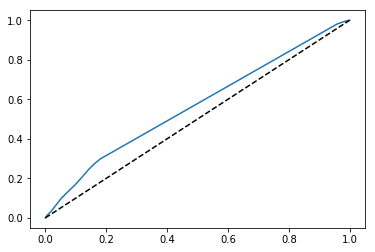

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prob = clf.predict_proba(X_train_counts[:,select])[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0,1],[0,1],'k--')

In [49]:
import sklearn.metrics as me
auc = me.roc_auc_score(y_train, y_pred_prob)
auc

0.5670175181225953

In [50]:
ks=max(tpr-fpr)
ks

0.1177917789406499

Test Set Validation

In [57]:
test = pd.DataFrame()
test['y'] = y_test
test['pred1']= clf.predict(X_test_tfidf[:,select])

In [58]:
test['pred1_right'] = 1.0 * (test['pred1']==test['y'])
test['pred1_wrong']= 1 - test['pred1_right']
test.pred1_wrong.mean()

0.20362562311966093

In [59]:
print(classification_report(test['pred1'], test['y']))

              precision    recall  f1-score   support

         0.0       0.00      0.57      0.00        47
         1.0       1.00      0.80      0.89     91027

   micro avg       0.80      0.80      0.80     91074
   macro avg       0.50      0.69      0.44     91074
weighted avg       1.00      0.80      0.89     91074



In [60]:
y_pred_proba = clf.predict_proba(X_test_counts[:,select])[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

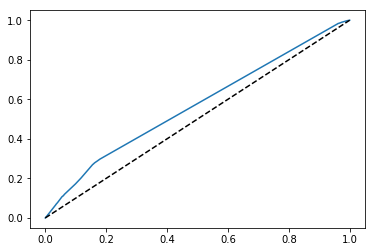

In [61]:
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot([0,1],[0,1],'k--')

In [62]:
auc1 = me.roc_auc_score(y_test, y_pred_proba)
auc1

0.5670782248033603

In [63]:
ks=max(tpr-fpr)
ks

0.11814085999972956